# Comparing Different Fitting Functions Final Project
## Comparison of Curve_fit, Scipy.odr, and Lmfit
**Mario Dajani Caceres**

[1] The purpose of curve_fit, scipy.odr, and lmfit are to use a set of data and make a fit for that data accounting for uncertainties. Each program does this differently however, for example curve_fit uses non-linear least squares to give the best fit of a set of data to a specific defined function. Lmfit utilizes a similar concept, however, it is more general than curve_fit as it has prebuilt models for different functions such as linear, Gaussian, Lorenztian, and exponential which makes it better to fit certain data by utilizing more advanced models than curve_fit. Scipy.odr is the most different out of all of these, since it is able to take into account uncertainties in the independent variable. ODR stands for Orthongonal Distance Regression which is different from least squares since least squares treats the independent variables as fixed, however, ODR can take into account the independent uncertainties.

[2] I selected these packages since I have been using curve_fit very often in PHYS 276 (E&M lab) and I am also learning about least square solutions in MATH 461 (Linear Algebra). These two classes along with PHYS 265 has made me very interested in analysing data and I was wondering what other ways I could fit this data and I wondered what I would do if there was also an uncertianty in the independent variable since I did a lab where I measured currents and voltages with voltmeters and I had uncertainties in both the x and y axis, but I couldn't take both uncertainties into account.

[3] Lmfit's core is based off of the Levnberg-Marquardt algorythm which was invented in the 1940s-1960s, but the python package was created around 2011 and it comes from the genealogy of MINIPACK and it is similar to scipy.optimize packages. Scipy.odr was released in 2001, the genealogy is ODRPACK and it resembles curve_fit's fitting functions. curve_fit is the more famous of these fitting packages, it was released in the early 2000s and it is built on top of the older scipy.optimize.leastsq functions in the FORTRAN genealogy.

[4] Lmfit is still maitained by Mathew Newville (the original aurthor) and the latest update was in March 2025. Scipy.odr and curve_fit are also currently maitained, but not by the main authors, but by the greater scipy community. 

[5] Installing was incredibly simple, for lmfit, all I had to do is write !pip install lmfit and then import lmftit, as for the other two, I simply imported them from scipy

[6] The packages are simply istalled from pip for lmfit and by importing scipy for odr and curve_fit

[7] The source code for lmfit is avialable at "https://github.com/lmfit/lmfit-py". Similarly for curve_fit (https://github.com/scipy/scipy/blob/main/scipy/optimize/_minpack_py.py) and odr (https://github.com/scipy/scipy/blob/main/scipy/odr/odrpack.py).

[8] Lmfit is used in pyspectkit and lmfitxps which are both systems dealing with spectroscopy and data analysis. Curve_fit and odr is used in matplotlib and scientific computing, however there are few packages that utilize these.

[9] The codes are all used within python scripts and jupyter notebooks.

[10] Code displayed below:

In [1]:
!pip install lmfit
import lmfit as fit
import numpy as np
from scipy.optimize import curve_fit
from scipy.odr import ODR, Model, RealData
import matplotlib.pyplot as plt

These graphs show the comparison between lmfit and curve_fit, as we can see, lmfit and curve_fit get the same fit which makes sense since they use similar techniques. The main difference, however, is that each package might be more useful for certain fits or functions.

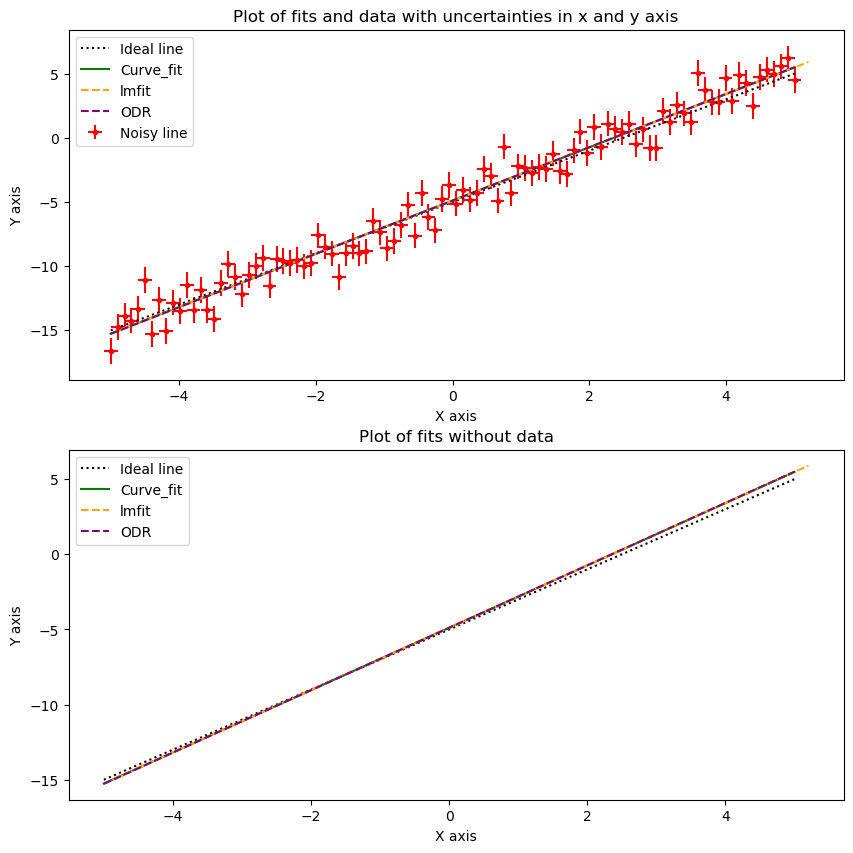

In [4]:

#test with X AND Y uncertainties
def linear(x,m,b):
    return m*x+b
#ideal line
a=-5
b=5
N=100
x_ideal=np.linspace(a,b,N)
m_ideal=2
b_ideal=-5
y_ideal=linear(x_ideal,m_ideal,b_ideal)

#uncertainties
seed=1234
y_sigma=1
x_sigma=.1
sigma=np.sqrt(y_sigma**2+x_sigma**2)
rng=np.random.default_rng(seed)
y_random=rng.normal(loc=0,scale=y_sigma,size=N)
x_random=rng.normal(loc=0,scale=x_sigma,size=N)
y_noise=y_ideal+y_random
x_noise=x_ideal+x_random

#Plotting the ideal line and the Noisy line
fig,(ax,ax1)=plt.subplots(2,1,figsize=(10,10))
ax.errorbar(x_ideal,y_noise,yerr=y_sigma,xerr=x_sigma,ls='',fmt='.',color='r',label='Noisy line')
ax.plot(x_ideal,y_ideal,color='k',ls='dotted',label='Ideal line')
ax1.plot(x_ideal,y_ideal,color='k',ls='dotted',label='Ideal line')


#Using Curve Fit
fit_par,pcov=curve_fit(linear,x_noise,y_noise,sigma=y_sigma,p0=[2,-5],absolute_sigma=True)
y_curvefit=linear(x_ideal,fit_par[0],fit_par[1])
ax.plot(x_ideal,y_curvefit,color='green',label='Curve_fit',ls='-')
ax1.plot(x_ideal,y_curvefit,color='green',label='Curve_fit',ls='-')


#Using lm_fit
model=fit.Model(linear)
params=model.make_params(m=m_ideal,b=b_ideal)
result=model.fit(y_noise,params,x=x_noise,weights=1/y_sigma)
#print(result.fit_report())
ax.plot(x_noise,result.best_fit,color='orange',label='lmfit',ls='--')
ax1.plot(x_noise,result.best_fit,color='orange',label='lmfit',ls='--')


#scipy.odr fit
def odr_linear(B, x):
    return B[0] * x + B[1]
model=Model(odr_linear)
mydata=RealData(x_noise,y_noise,sx=x_sigma,sy=y_sigma)
myodr=ODR(mydata,model,beta0=[m_ideal,b_ideal])
myoutput=myodr.run()
#myoutput.pprint()
y_odr=linear(x_ideal,*myoutput.beta)
ax.plot(x_ideal, y_odr, color='purple', label='ODR', ls='--')
ax1.plot(x_ideal, y_odr, color='purple', label='ODR', ls='--')


ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_title('Plot of fits and data with uncertainties in x and y axis')
ax1.set_xlabel('X axis')
ax1.set_ylabel('Y axis')
ax1.set_title('Plot of fits without data')
ax.legend()
ax1.legend()

As we can see from these plots, all of the fits give similar plots. Something to mention is that to fit using odr we took into account the individual uncertainties, but for lmfit and curve_fit we took y uncertainty. This means that odr computes the uncertainties better qualitatively since it is taking a more accurate representation of the uncertainties. However, the actual fits are very similar even if the method of obtaining them is different.

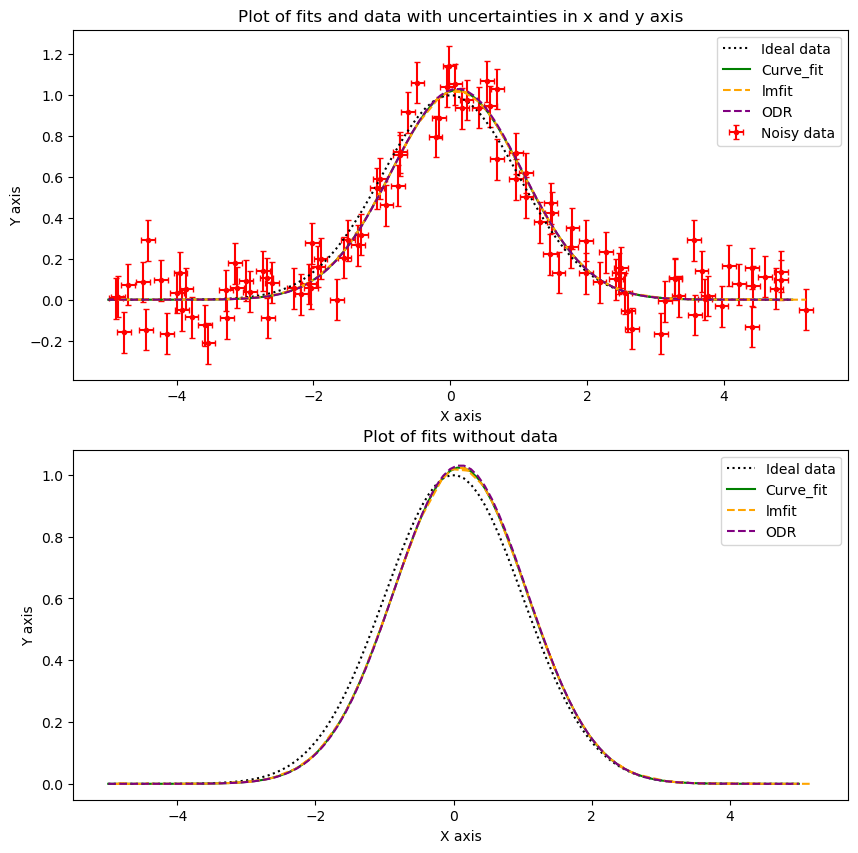

In [3]:
# fitting a Gaussian/Normal Function

def gaussian(x, amp, mean, sigma):
    return amp * np.exp(-((x - mean)**2) / (2 * sigma**2))

#data
np.random.seed(seed)
N=100
x_ideal = np.linspace(-5, 5, N)
true_params = [1.0, 0.0, 1.0]  # amplitude, mean, sigma
y_ideal = gaussian(x_ideal, true_params[0],true_params[1],true_params[2])

#uncertainty/noise

y_sigma=.1
x_sigma=.1
rng=np.random.default_rng(seed)
y_random=rng.normal(loc=0,scale=y_sigma,size=N)
x_random=rng.normal(loc=0,scale=x_sigma,size=N)
y_noise=y_ideal+y_random
x_noise=x_ideal+x_random

#plotting
fig,(ax,ax1)=plt.subplots(2,1,figsize=(10,10))
ax.errorbar(x_noise,y_noise, yerr=y_sigma,xerr=x_sigma, fmt='.', ls='', capsize=2, color='r',label='Noisy data')
ax.plot(x_ideal,y_ideal,  marker='', ls='dotted',  color='k',label='Ideal data')
ax1.plot(x_ideal,y_ideal,  marker='', ls='dotted', color='k',label='Ideal data')


#Using Curve Fit
fit_par,pcov=curve_fit(gaussian,x_noise,y_noise,sigma=y_sigma,p0=true_params,absolute_sigma=True)
y_curvefit=gaussian(x_ideal,fit_par[0],fit_par[1],fit_par[2])
ax.plot(x_ideal,y_curvefit,color='green',label='Curve_fit',ls='-')
ax1.plot(x_ideal,y_curvefit,color='green',label='Curve_fit',ls='-')

#Using lm_fit
model=fit.Model(gaussian)
params=model.make_params(amp=true_params[0], mean=true_params[1],sigma=true_params[2])
result=model.fit(y_noise,params,x=x_noise,weights=1/y_sigma)
#print(result.fit_report())
ax.plot(x_noise,result.best_fit,color='orange',label='lmfit',ls='--')
ax1.plot(x_noise,result.best_fit,color='orange',label='lmfit',ls='--')


#scipy.odr fit
def odr_gaussian(B, x):
    return B[0] * np.exp(-((x - B[1])**2) / (2 * B[2]**2))
model=Model(odr_gaussian)
mydata=RealData(x_noise,y_noise,sx=x_sigma,sy=y_sigma)
myodr=ODR(mydata,model,beta0=true_params)
myoutput=myodr.run()
#myoutput.pprint()
y_odr=gaussian(x_ideal,*myoutput.beta)
ax.plot(x_ideal, y_odr, color='purple', label='ODR', ls='--')
ax1.plot(x_ideal, y_odr, color='purple', label='ODR', ls='--')



#labels
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_title('Plot of fits and data with uncertainties in x and y axis')
ax1.set_xlabel('X axis')
ax1.set_ylabel('Y axis')
ax1.set_title('Plot of fits without data')
ax.legend()
ax1.legend()

Caption: As you can see from these graphs, all fits get you similar plots, however, the odr fit is the more different one from the three as it reaches higher on the peak. We can also see that at the peak, lmfit is a little closer to the actual ideal plot which could be due to it's model functions for gaussian fits. Overall all of these fits performed similarly, the main differences where the inputs and processes in which they arrived at the fit, however, the fits are pretty similar.

[11] I utilized matplotlib to plot the graphs of the fits.

[12] The cells up above contain plots and captions utilizing the different packages.

[13] Lmfit is written in pure python, however, it is derived from scipy functions that are in FORTRAN and C code.

[14] Lmfit takes in model function, parameters, and the data. Odr takes in a model, and data or it can even create its own data from scratch. Curve fit takes in a function, data and you can give it a guess of the parameters.

[15] Lmfit returns best fit data, odr and curve_fit returns best fit parameters.

[16] Lmfit has code that does unit tests, regression tests, and benchmarking, you can find these by typing "pip install lmfit[test]" and "pip install asv". SImilarly, Scipy odr and curve_fit both have integrated unit and regression tests, however, they don't have benchmarking tools, but that is ok since Scipy's optimization process makes up for this.

[17] All three of these packages have unit tests and regression tests on top of additional benchmarking or optimization code. It also is used very often by professional scientists and programmers, and is very transparent about its code and functions making it easy for the public to review, comment, and maintain. Given that the code is consitent, reviewed, and optimized for the best results, we can say that they all provide a reliable result.

[18] To find what programs lmfit uses, we can type "!pip show lmfit" and if we scroll down we see that it read "Requires: asteval, dill, numpy, scipy, uncertainties" which are the python programs that lmfit uses in its code. We can do the same thing with scipy, and it says that it uses numpy within its code. Appart from this, curve_fit specifically uses scipy.optimize.leastsq within its code and odr uses scipy a source code called "ODRPACK".

[19] Lmfit's documentation provides information about the parameter and model functions and it provides documentation on how to extract the data. It is well organized which is good since there is a lot of text talking about the documentation. Odr and Curve_fit has less documentation which makes sense since it is a simpler program and it guides through the different inputs and outputs, although it has less information than lmfit, it was still sufficient to understand the code.

[20] 

Citation for lmfit:

Newville, M., Otten, R., Nelson, A., Stensitzki, T., Ingargiola, A., Allan, D., Fox, A., Carter, F., & Rawlik, M. (2025). LMFIT: Non-Linear Least-Squares Minimization and Curve-Fitting for Python (1.3.3). Zenodo. https://doi.org/10.5281/zenodo.15014437

Citation for Scipy (in general, includes odr and curve_fit):

Pauli Virtanen, Ralf Gommers, Travis E. Oliphant, Matt Haberland, Tyler Reddy, David Cournapeau, Evgeni Burovski, Pearu Peterson, Warren Weckesser, Jonathan Bright, Stéfan J. van der Walt, Matthew Brett, Joshua Wilson, K. Jarrod Millman, Nikolay Mayorov, Andrew R. J. Nelson, Eric Jones, Robert Kern, Eric Larson, CJ Carey, İlhan Polat, Yu Feng, Eric W. Moore, Jake VanderPlas, Denis Laxalde, Josef Perktold, Robert Cimrman, Ian Henriksen, E.A. Quintero, Charles R Harris, Anne M. Archibald, Antônio H. Ribeiro, Fabian Pedregosa, Paul van Mulbregt, and SciPy 1.0 Contributors. (2020) SciPy 1.0: Fundamental Algorithms for Scientific Computing in Python. Nature Methods, 17(3), 261-272. DOI: 10.1038/s41592-019-0686-2.

[21] 

LMFIT references:

https://lmfit.github.io/lmfit-py/model.html

https://github.com/lmfit/uncertainties#:~:text=Revised%20BSD%20License.-,History,lmfit%20GitHub%20organization%20in%202024.

Curve_fit references:

https://scientific-python-101.readthedocs.io/scipy/fitting_curves.html

Scipy.odr references:

https://docs.scipy.org/doc/scipy/reference/odr.html#:~:text=The%20scipy.,Guide%2C%20reading%20which%20is%20recommended.

[22] 

LMFIT:

Growth dynamics of gut microbiota in health and disease inferred from single metagenomic samples: http://doi.org/10.1126/science.aac4812

Sorption of methanol, dimethyl carbonate, methyl acetate, and acetone vapors in CTA and PTMSP: General findings from the GAB Analysis: https://onlinelibrary.wiley.com/doi/10.1002/polb.23945

Curve_fit:

Improved fuzzy weighted optimum curve-fitting method for estimating the parameters of a Pearson Type-III distribution: https://doi.org/10.1080/02626667.2019.1620950

Scipy.odr:

Calibration of a single-diode performance model without a short-circuit temperature coefficient: https://doi.org/10.1002/ese3.190

[23] I had to learn how to use models and parameters for lmfit, but apart from that I have used scipy and numpy in class before so the rest was very straight forward but I still learned a lot of the meaning and processes behind each function. 

[24] I have prior experience using curve_fit, but odr and lmfit were new to me but I'm very glad I learned about it since I am now better at doing fits and reading python documentation. I worked individually on this project.